# Examen

Load modules

<div style="float: right;" markdown="1">
    <img src="../material/figures/leastaction.png">
</div>
Para el problema de un resorte con una masa en el extremo de 0.2 Kg y una constante elástica $k=0.8$ N/m, defina una función en Python que mininimize la acción:


$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$
entre $t_1=0$ y $t_1=\pi/2$

y donde 

$$L(t)=T(t)-V(t)$$

con
$$T=\frac12 m v^2\,\qquad V=\frac12 k x^2\,$$

Para la trayectoria que minimize la acción encuentre y grafique  todas la cantidades físicas como velocidad, aceleración y energía.


In [274]:
%pylab inline
import numpy as np
import scipy.optimize as optimize
from scipy.misc import derivative

Populating the interactive namespace from numpy and matplotlib


In [275]:
# Action function
def S(x,tini=np.pi/8,tfin=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757):
    
    tini=float(tini)
    tfin=float(tfin)
    x=np.asarray(x)
    Dt=(tfin-tini)/x[:-1].size
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*((x[1:]-x[:-1])/Dt)**2 - 0.5*k*((x[1:]+x[:-1])/2)**2)*Dt).sum()

In [276]:
#Find least action routine

def xfit(n,tini=np.pi/8,tfin=3*np.pi/8,m=0.2,k=0.8,xini=0.70710678118654757,xend=0.70710678118654757,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    
    tini=float(tini)
    tfin=float(tfin)

    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(tini,tfin,m,k,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=(tfin-tini)/x[:-1].size
    return x,xmax,Smin,Dt  

In [277]:
#Problem conditions
n=23
tini=np.pi/8
tfin=3*np.pi/8
Dt=(tfin-tini)/x[:-1].size
m=0.2
k=0.8
y=xfit(n,tini,tfin,m,k,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -0.199867
         Iterations: 37
         Function evaluations: 9937


In [278]:
t=np.linspace(tini,tfin,n) #time s
x=y[0] # position m
v=(x[1:]-x[:-1])/y[3] # velocity m/s
T=0.5*m*v**2 # kinetic energy
V=0.5*k*((x[1:]+x[:-1])/2)**2 # potential energy

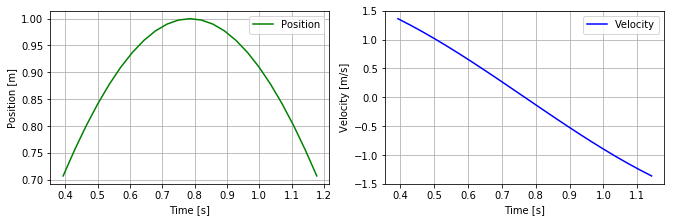

In [279]:
plt.figure(figsize=[11,7])

#Ploting position
plt.subplot(221)
plt.plot(t,x,'g',label='Position')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()
plt.grid()

#Ploting velocity
plt.subplot(222)
plt.plot(t[:-1],v,'b', label='Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid()

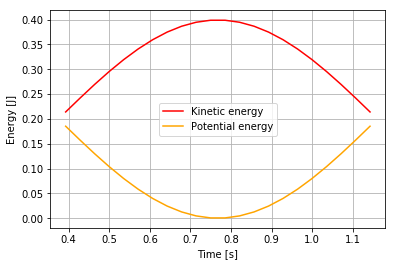

In [280]:
#ploting energies
plt.plot(t[:-1],V, label='Kinetic energy ',color='red')
plt.plot(t[:-1],T,label='Potential energy',color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid()